In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data_df = pd.read_csv("C:/Users/shaun/OneDrive/Desktop/epilepsy-risk-dashboard/data/epilepsy_seizure_simulated_data.csv")
data_df.head()
data_df.info()
data_df.describe()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Sleep_Hours                       3000 non-null   float64
 2   Stress_Level                      3000 non-null   int64  
 3   Temperature_C                     3000 non-null   float64
 4   Missed_Medication                 3000 non-null   int64  
 5   Alcohol_Intake                    3000 non-null   int64  
 6   Screen_Time_Hours                 3000 non-null   float64
 7   Physical_Activity_Hours_Per_Week  3000 non-null   int64  
 8   Seizure                           3000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 211.1 KB


(3000, 9)

In [21]:
#Clean data
# Identify null
print(data_df.isnull().sum())

Age                                 0
Sleep_Hours                         0
Stress_Level                        0
Temperature_C                       0
Missed_Medication                   0
Alcohol_Intake                      0
Screen_Time_Hours                   0
Physical_Activity_Hours_Per_Week    0
Seizure                             0
dtype: int64


In [26]:
# Clean the data
data_df_cleaned = data_df.dropna().drop_duplicates()

# Save 
data_df_cleaned.to_csv("../data/cleaned_data.csv", index=False)

#Verify
print(f"New shape: {data_df.shape}")
print("Cleaned data saved successfully.")

New shape: (3000, 9)
Cleaned data saved successfully.


In [27]:
#Compare
print(f"Original rows: {len(data_df)}")
print(f"Cleaned rows: {len(data_df_cleaned)}")
print(f"Rows lost: {len(data_df) - len(data_df_cleaned)}")

Original rows: 3000
Cleaned rows: 3000
Rows lost: 0


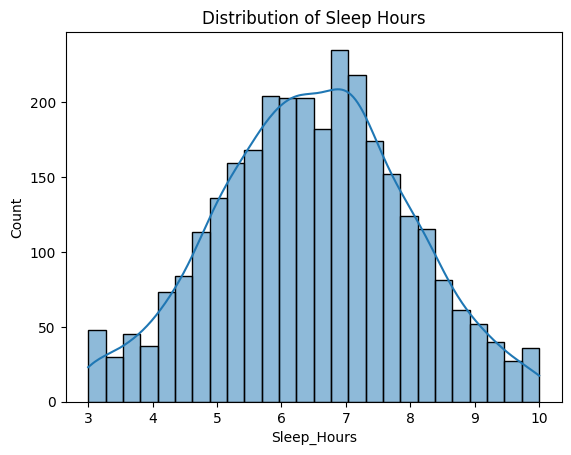

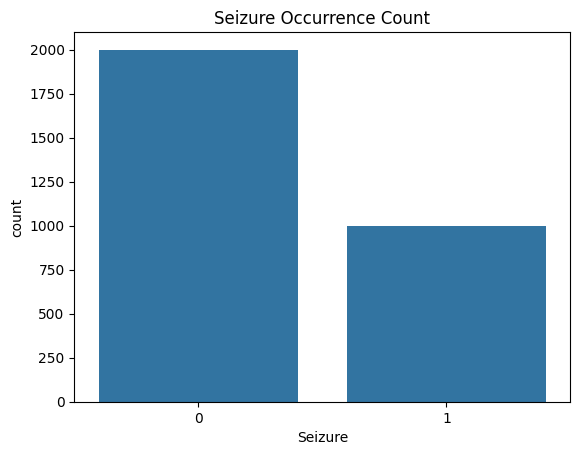

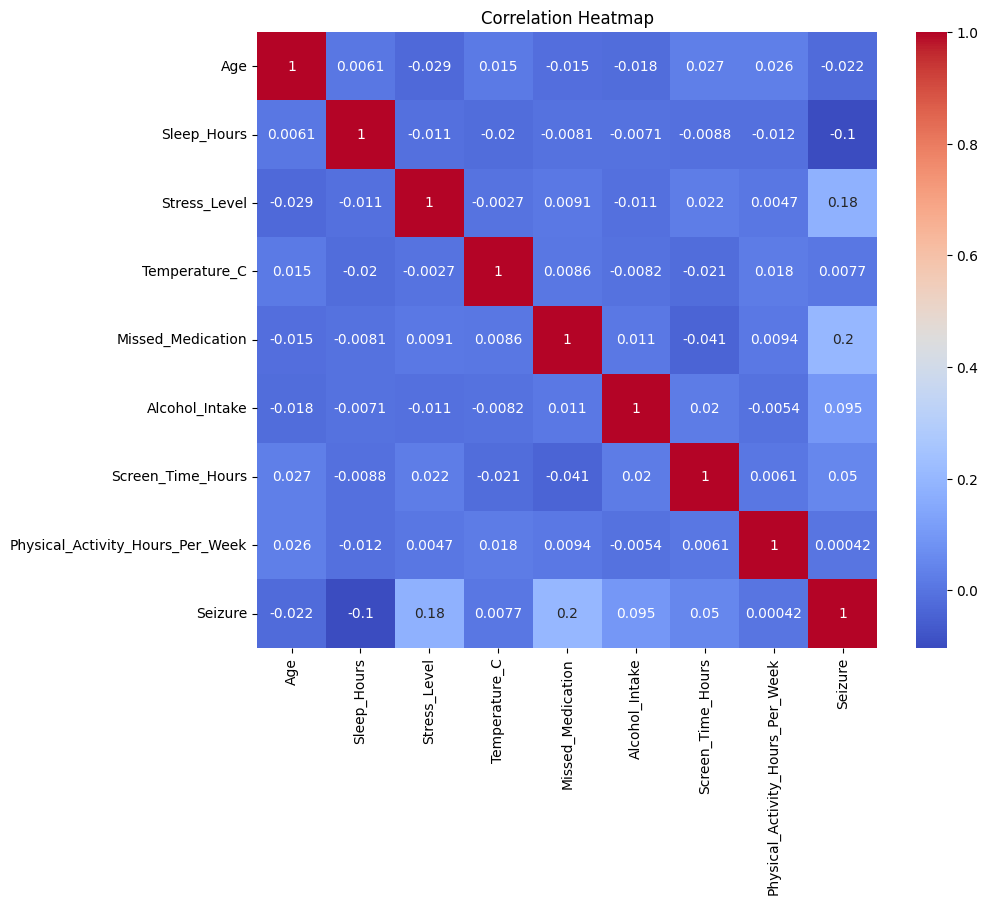

In [30]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Sleep Hours
sns.histplot(data_df_cleaned["Sleep_Hours"], kde=True) # Added kde for better trend visibility
plt.title("Distribution of Sleep Hours")
plt.show()

# Count of Seizures (Target Variable)
sns.countplot(x="Seizure", data=data_df_cleaned) 
plt.title("Seizure Occurrence Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [36]:
#Prepare data
from sklearn.model_selection import train_test_split

X = data_df_cleaned.drop("Seizure", axis=1)
y = data_df_cleaned["Seizure"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 2400 rows
Testing set size: 600 rows


In [37]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [38]:
#Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       420
           1       0.62      0.27      0.37       180

    accuracy                           0.73       600
   macro avg       0.68      0.60      0.60       600
weighted avg       0.71      0.73      0.69       600

[[390  30]
 [132  48]]


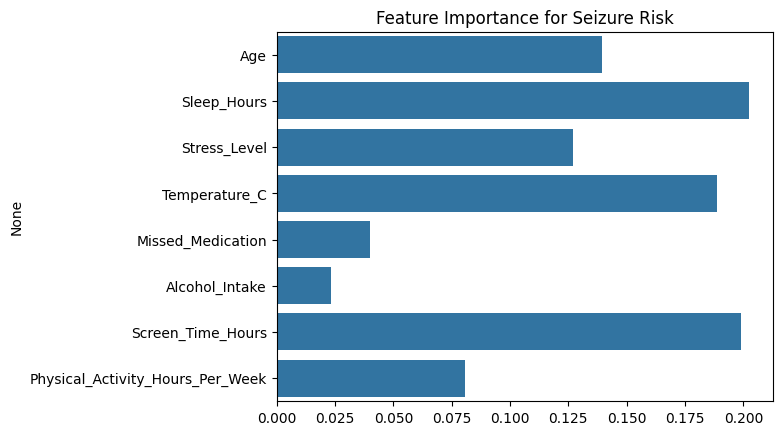

In [40]:
#Feature importance
from sklearn.ensemble import RandomForestClassifier

#Initialize the model
rf = RandomForestClassifier(random_state=42)

#Train the model 
rf.fit(X_train, y_train)

#Extract and plot importance
importances = rf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Seizure Risk")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define X and y 
X = data_df_cleaned.drop("Seizure", axis=1)
y = data_df_cleaned["Seizure"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

# Save
joblib.dump(rf, "../models/model.pkl")

Train Accuracy: 1.0
Test Accuracy: 0.71


['../models/model.pkl']

In [53]:
X = data_df_cleaned.drop("Seizure", axis=1)
print(X.columns)

Index(['Age', 'Sleep_Hours', 'Stress_Level', 'Temperature_C',
       'Missed_Medication', 'Alcohol_Intake', 'Screen_Time_Hours',
       'Physical_Activity_Hours_Per_Week'],
      dtype='object')


In [54]:
data_df_cleaned.columns

Index(['Age', 'Sleep_Hours', 'Stress_Level', 'Temperature_C',
       'Missed_Medication', 'Alcohol_Intake', 'Screen_Time_Hours',
       'Physical_Activity_Hours_Per_Week', 'Seizure'],
      dtype='object')